In [159]:
from __future__ import print_function
import pandas as pd
import pylab as pl
import statsmodels.api as st
import scipy as sp 
from scipy import stats
import matplotlib as plt
import seaborn  as sns
import os
import geopandas as gpd
from scipy import ndimage

%pylab inline


Populating the interactive namespace from numpy and matplotlib


'data' downloaded as shapefile from: https://data.cityofnewyork.us/Transportation/Subway-Stations/arq3-7z49
        
<br>

'boro' downloaded as shapefile from: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

In [15]:
!unzip "SubwayStations.zip" -d "$PUIDATA"

Archive:  SubwayStations.zip
replace /home/cusp/mas1300/PUIdata/geo_export_fe2eb1a7-e624-4f44-a3fd-90ab5d665412.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [16]:

# Read file using gpd.read_file()
data = gpd.read_file(os.getenv("PUIDATA") + "/geo_export_fe2eb1a7-e624-4f44-a3fd-90ab5d665412.shp")

In [17]:
data.head()

,notes,url,name,objectid,line,geometry
0,"4 nights, 6-all times, 6 Express-weekdays AM s...",http://web.mta.info/nyct/service/,Astor Pl,1.0,4-6-6 Express,POINT (-73.99106999861966 40.73005400028978)
1,"4 nights, 6-all times, 6 Express-weekdays AM s...",http://web.mta.info/nyct/service/,Canal St,2.0,4-6-6 Express,POINT (-74.00019299927328 40.71880300107709)
2,"1-all times, 2-nights",http://web.mta.info/nyct/service/,50th St,3.0,1-2,POINT (-73.98384899986625 40.76172799961419)
3,"4-nights, 3-all other times, 2-all times",http://web.mta.info/nyct/service/,Bergen St,4.0,2-3-4,POINT (-73.97499915116808 40.68086213682956)
4,"4-nights, 3-all other times",http://web.mta.info/nyct/service/,Pennsylvania Ave,5.0,3-4,POINT (-73.89488591154061 40.66471445143568)


In [21]:
data.shape

data= data[['name','line','geometry']]

In [158]:
data.shape

(473, 3)

In [23]:
data.head()

,name,line,geometry
0,Astor Pl,4-6-6 Express,POINT (-73.99106999861966 40.73005400028978)
1,Canal St,4-6-6 Express,POINT (-74.00019299927328 40.71880300107709)
2,50th St,1-2,POINT (-73.98384899986625 40.76172799961419)
3,Bergen St,2-3-4,POINT (-73.97499915116808 40.68086213682956)
4,Pennsylvania Ave,3-4,POINT (-73.89488591154061 40.66471445143568)


In [24]:
data.line.unique()

array([u'4-6-6 Express', u'1-2', u'2-3-4', u'3-4', u'1', u'A-B-C', u'A-C',
       u'E-M-R', u'J-M-Z', u'J-Z', u'B-D-N-Q-R', u'A-S', u'2-5', u'B-D',
       u'7-7 Express', u'6-6 Express', u'4-5-6-6 Express', u'D-N-R',
       u'2-3-4-5', u'4', u'6', u'A', u'B-D-F-M', u'B-Q-S', u'D', u'E',
       u'E-F', u'E-J-Z', u'E-M', u'F', u'G', u'L', u'J', u'J-M', u'N',
       u'N-W', u'N-Q-R-W', u'S', u'Q', u'7-7 Express-N-W', u'F-G', u'B-Q',
       u'D-N-Q-R', u'4-5', u'5', u'1-2-3', u'2-3', u'3', u'7', u'F-Q',
       u'A-C-E', u'M', u'E-F-M-R', u'2', u'A-B-C-D', u'R', u'B-D-E',
       u'N-R-W', u'F-M', u'A-C-G', u'A-C-F', u'N-R', u'R-W', u'N-Q',
       u'A-C-S', u'D-F-N-Q'], dtype=object)

In [29]:
pd.value_counts(data['line'])


2-5                26
L                  24
F                  21
1                  20
A-C                18
J-Z                15
A                  14
4-6-6 Express      14
4                  13
D                  13
Q                  12
1-2                12
G                  12
A-S                12
7-7 Express        11
E-M-R              11
B-D                11
3-4                10
2-3                10
7                  10
N-Q-R-W             9
6                   9
6-6 Express         9
N                   9
A-C-E               8
A-B-C               8
F-G                 8
M                   7
J                   7
B-Q                 7
                   ..
4-5                 5
B-D-F-M             5
5                   5
S                   5
R                   4
2-3-4               3
E-F                 3
E-M                 3
A-B-C-D             3
J-M-Z               3
2-3-4-5             3
J-M                 3
F-Q                 2
3                   2
E-J-Z     

In [55]:
!unzip "BoroughBoundaries.zip" -d "$PUIDATA"

Archive:  BoroughBoundaries.zip
  inflating: /home/cusp/mas1300/PUIdata/geo_export_81d106b0-6483-4700-ad86-dd9feebdafe9.dbf  
  inflating: /home/cusp/mas1300/PUIdata/geo_export_81d106b0-6483-4700-ad86-dd9feebdafe9.shp  
  inflating: /home/cusp/mas1300/PUIdata/geo_export_81d106b0-6483-4700-ad86-dd9feebdafe9.shx  
  inflating: /home/cusp/mas1300/PUIdata/geo_export_81d106b0-6483-4700-ad86-dd9feebdafe9.prj  


In [56]:
boro = gpd.read_file(os.getenv("PUIDATA") + "/geo_export_81d106b0-6483-4700-ad86-dd9feebdafe9.shp")

In [57]:
boro.head()

,boro_name,boro_code,shape_leng,shape_area,geometry
0,Staten Island,5.0,330437.103648,1.623914e+09,(POLYGON ((-74.05050806403247 40.5664220341608...
1,Bronx,2.0,464365.638670,1.186678e+09,(POLYGON ((-73.89680883223774 40.7958084451597...
2,Queens,4.0,895720.956401,3.044780e+09,(POLYGON ((-73.83668274106707 40.5949466970158...
3,Brooklyn,3.0,741077.854437,1.937478e+09,(POLYGON ((-73.86706149472118 40.5820879767934...
4,Manhattan,1.0,361050.577478,6.364799e+08,(POLYGON ((-74.01092841268031 40.6844914725429...


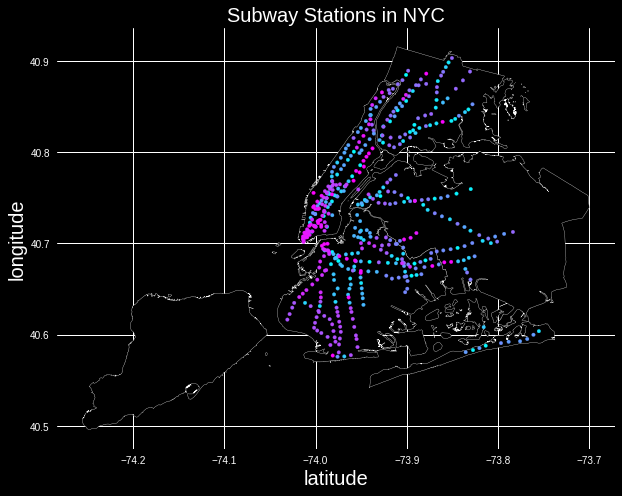

In [157]:
#https://matplotlib.org/devdocs/gallery/style_sheets/dark_background.html
plt.style.use('dark_background')
base = boro.plot(color='black', edgecolor='white', figsize=(10,10))
data.plot(ax=base, colormap='cool', marker='.', figsize=(10,10))
plt.title("Subway Stations in NYC", size=20)
plt.ylabel("longitude", size=20)
plt.xlabel("latitude", size=20);

Each dot indicates a subway station. There are 473 subway stations in total. The stations are overlayed on the map of the 5 boroughs.

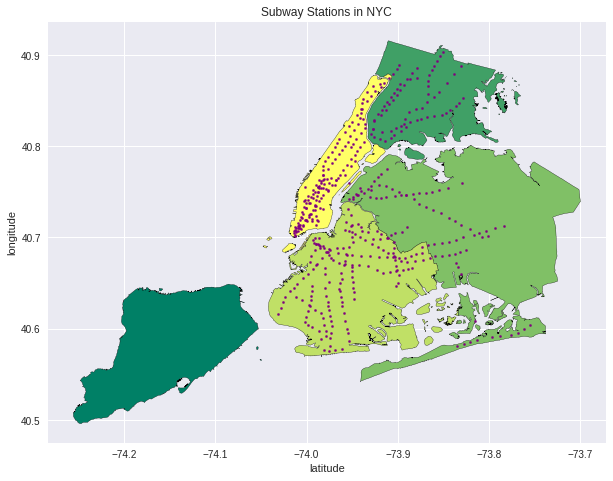

In [138]:
#http://basemaptutorial.readthedocs.io/en/latest/subplots.html

base = boro.plot(colormap='summer', edgecolor='black', figsize=(10,10))

data.plot(ax=base, marker='o', color='purple', markersize=5)
plt.title("Subway Stations in NYC")
plt.ylabel("longitude")
plt.xlabel("latitude");

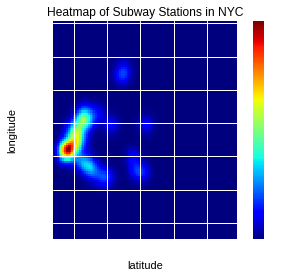

In [165]:
#http://nbviewer.jupyter.org/gist/perrygeo/c426355e40037c452434

def heatmap(data, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(data.geometry.apply(getx))
    y = list(data.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    plt.title("Heatmap of Subway Stations in NYC", color='black')
    plt.ylabel("longitude", color='black')
    plt.xlabel("latitude", color='black')
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()
heatmap(data, bins=(100,100), smoothing=3, cmap='jet')

#heatmap.plot(ax=base, marker='o', c='yellow', markersize=5);

attempt at heatmap of subway stations in nyc